In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc

font_path = './Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=16)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=40) # figure title 폰트 크기



### 네이버 자료 대분류별 자료 통합 분석

    - 자료출처 : 네이버 데이터 랩 (https://datalab.naver.com/)

In [10]:
TOTAL_PATH = './naver_shopping/'
os.listdir(TOTAL_PATH)


['가구_인테리어.csv',
 '도서.csv',
 '디지털_가전.csv',
 '생활건강.csv',
 '스포츠레저.csv',
 '식품.csv',
 '여가_생활편의.csv',
 '패션의류.csv',
 '패션잡화.csv',
 '화장품_미용.csv']

In [11]:
total_datas = [pd.read_csv(TOTAL_PATH + f, index_col= 0 ) for f in os.listdir(TOTAL_PATH)]
total_data_names = [f.split('.')[0] for f in os.listdir(TOTAL_PATH)]


In [12]:
total_datas[0]

,남자10대,남자20대,남자30대,남자40대,남자50대,남자60대,여자10대,여자20대,여자30대,여자40대,여자50대,여자60대
날짜,,,,,,,,,,,,
2021-07-09,48,62,59,51,53,59,49,65,57,50,49,54
2021-07-10,65,65,66,58,59,62,70,71,65,60,60,61
2021-07-11,79,81,85,71,68,68,78,88,82,74,68,66
2021-07-12,63,84,85,70,67,68,62,86,78,66,58,61
2021-07-13,58,83,79,66,64,67,58,82,75,64,58,62
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-05,39,74,71,63,69,79,34,62,57,54,59,71
2022-07-06,40,73,68,61,67,77,34,60,56,53,58,69
2022-07-07,37,70,65,57,64,74,35,57,53,50,56,66


In [13]:
total_total = pd.concat([data.apply(sum, axis = 1) for data in total_datas], axis = 1)
total_total.columns = total_data_names

total_total

,가구_인테리어,도서,디지털_가전,생활건강,스포츠레저,식품,여가_생활편의,패션의류,패션잡화,화장품_미용
날짜,,,,,,,,,,
2021-07-09,656,337,755,700,561,566,490,445,527,129
2021-07-10,762,331,835,723,639,570,521,524,611,143
2021-07-11,908,376,966,824,770,667,544,615,692,169
2021-07-12,848,430,1016,852,743,739,536,551,598,162
2021-07-13,816,420,1031,818,725,737,538,564,588,163
...,...,...,...,...,...,...,...,...,...,...
2022-07-05,732,512,939,813,847,830,940,629,627,184
2022-07-06,716,509,925,803,814,807,918,624,615,182
2022-07-07,684,486,892,771,762,791,880,590,580,174


<AxesSubplot:xlabel='날짜'>

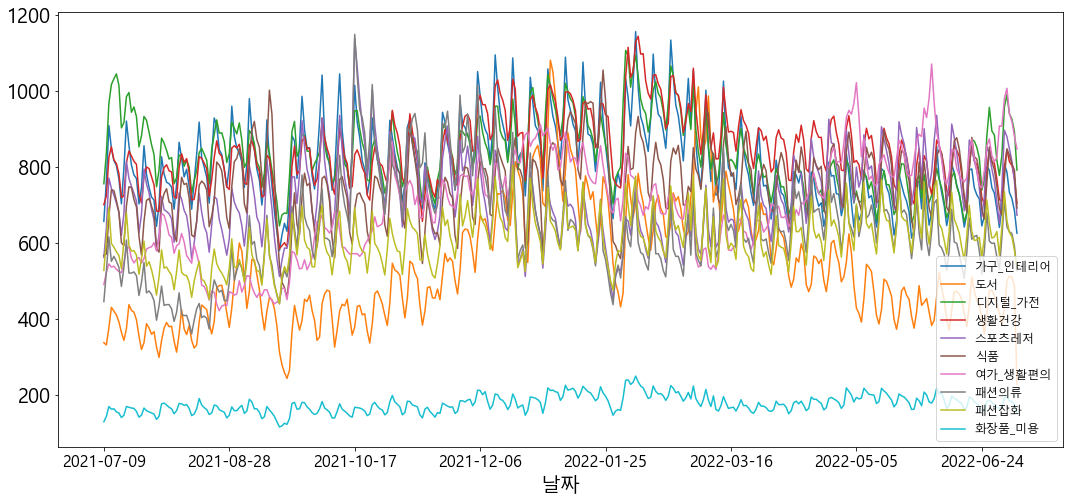

In [14]:
fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(1,1,1)
total_total.iloc[:-1].plot(ax = ax)

Text(0.5, 0, '')

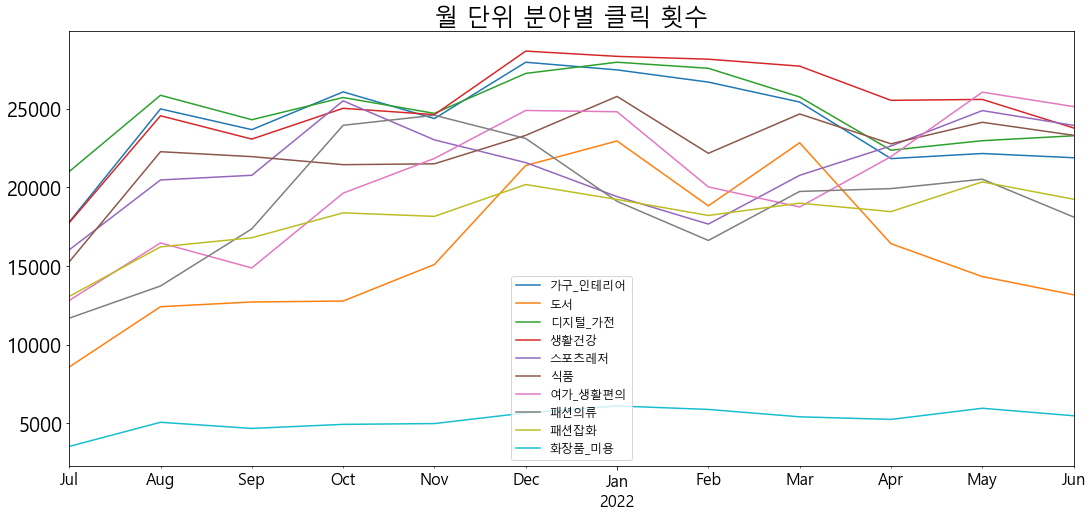

In [17]:

total_total.index = pd.to_datetime(total_total.index)
total_month_datas = total_total.to_period('m').reset_index().groupby('날짜').sum()


fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(1,1,1)
total_month_datas.iloc[:-1].plot(ax = ax)

plt.title('월 단위 분야별 클릭 횟수')
plt.xlabel('')

In [18]:
def min_max(data):
    data_max, data_min = data.max(), data.min() 
    return (data-data_min)/(data_max - data_min)
    
total_month_datas.apply(min_max)

,가구_인테리어,도서,디지털_가전,생활건강,스포츠레저,식품,여가_생활편의,패션의류,패션잡화,화장품_미용
날짜,,,,,,,,,,
2021-07,0.530122,0.260892,0.653572,0.499610,0.488029,0.447092,0.255398,0.325489,0.507674,0.432164
2021-08,0.862761,0.458104,0.895309,0.811500,0.728206,0.815189,0.461257,0.432538,0.720776,0.771013
2021-09,0.801777,0.473535,0.817837,0.743500,0.744312,0.798727,0.371795,0.622477,0.760057,0.684536
2021-10,0.912826,0.476570,0.888180,0.833280,1.000000,0.771800,0.639058,0.966635,0.866946,0.741672
2021-11,0.834351,0.596111,0.837928,0.814801,0.865914,0.774745,0.763102,1.000000,0.851869,0.752702
2021-12,1.000000,0.919706,0.964555,1.000000,0.787764,0.869833,0.934660,0.922759,0.988709,0.902713
2022-01,0.977512,1.000000,1.000000,0.984639,0.671026,1.000000,0.929993,0.713994,0.924481,1.000000
2022-02,0.941560,0.787871,0.980807,0.976386,0.576609,0.809824,0.661437,0.583882,0.855723,0.950805
2022-03,0.882982,0.994033,0.889925,0.956119,0.744150,0.941306,0.589575,0.746784,0.908593,0.847562


Text(0.5, 0, '')

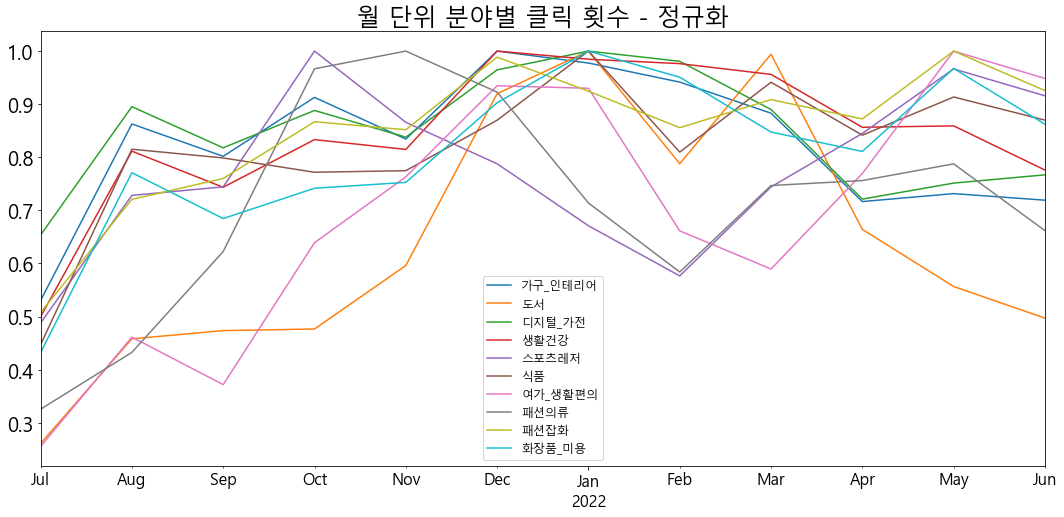

In [21]:
fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(1,1,1)
total_month_datas.apply(min_max).iloc[:-1].plot(ax = ax)

plt.title('월 단위 분야별 클릭 횟수 - 정규화')
plt.xlabel('')

### 도서 분야별 네이버 자료 비교

In [23]:
TOTAL_BOOK_PATH = './book_naver/'
os.listdir(TOTAL_PATH)


total_books = [pd.read_csv(TOTAL_BOOK_PATH + f, index_col= 0 ) for f in os.listdir(TOTAL_BOOK_PATH)]
total_book_names = [f.split('.')[0] for f in os.listdir(TOTAL_BOOK_PATH)]


total_total_books = pd.concat([data.apply(sum, axis = 1) for data in total_books], axis = 1)
total_total_books.columns = total_book_names

total_total_books


,건강,경제_경영,생활취미레저,소설,자기계발,컴퓨터_IT
날짜,,,,,,
2021-07-09,273.0,183,283,288,110.0,163
2021-07-10,244.0,190,297,293,83.0,126
2021-07-11,314.0,238,346,330,90.0,155
2021-07-12,386.0,307,361,314,101.0,183
2021-07-13,361.0,282,366,342,104.0,172
...,...,...,...,...,...,...
2022-07-05,NaN,201,523,327,NaN,310
2022-07-06,NaN,195,574,301,NaN,243
2022-07-07,NaN,200,509,312,NaN,269


Text(0.5, 0, '')

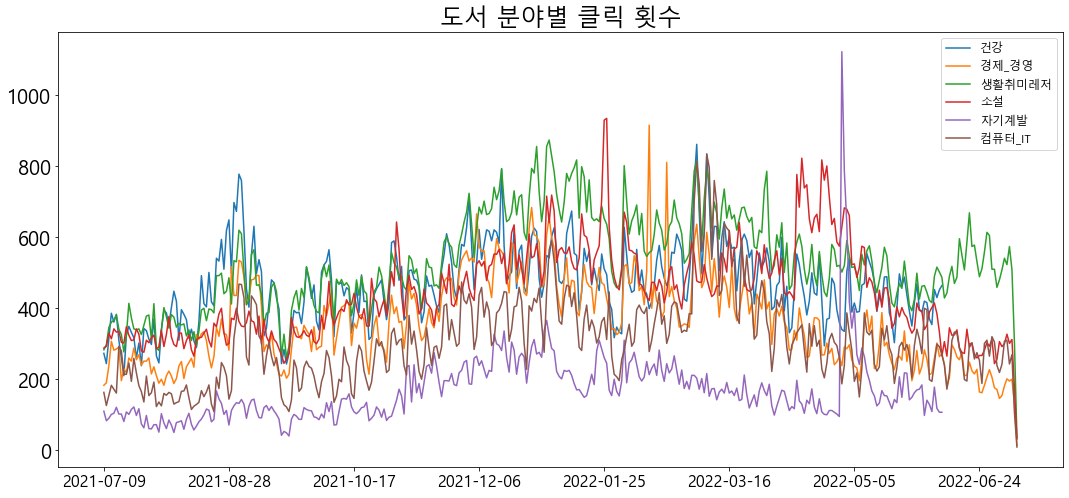

In [26]:
fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(1,1,1)
total_total_books.plot(ax = ax)

plt.title('도서 분야별 클릭 횟수')
plt.xlabel('')

Text(0.5, 0, '')

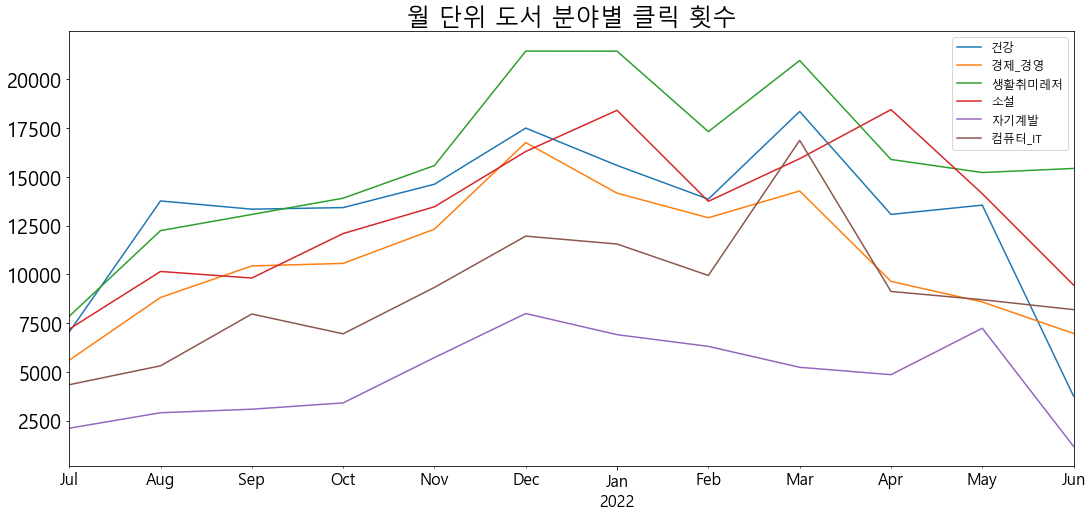

In [28]:

total_total_books.index = pd.to_datetime(total_total_books.index)
total_month_books = total_total_books.to_period('m').reset_index().groupby('날짜').sum()


fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(1,1,1)
total_month_books.iloc[:-1].plot(ax = ax)

plt.title('월 단위 도서 분야별 클릭 횟수')
plt.xlabel('')

Text(0.5, 0, '')

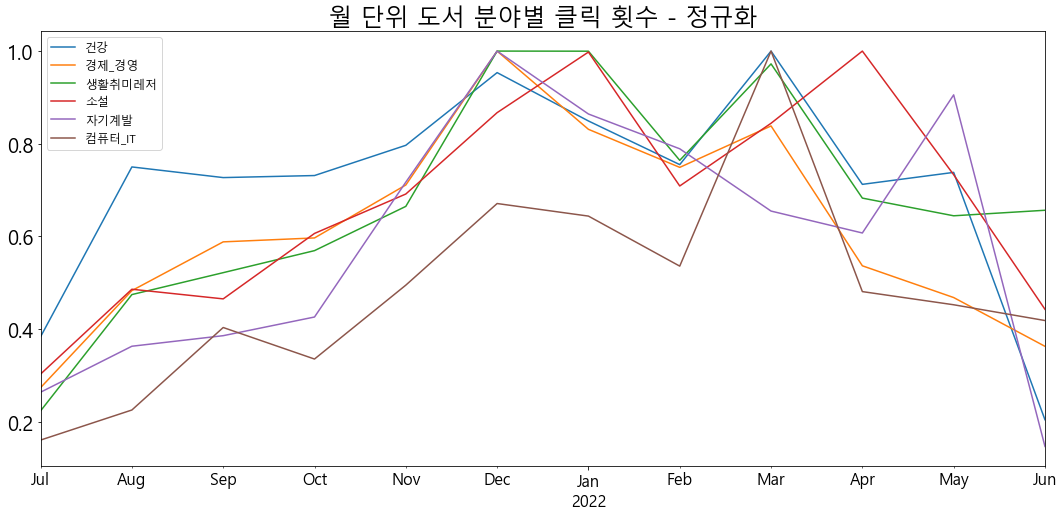

In [30]:
fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(1,1,1)
total_month_books.apply(min_max).iloc[:-1].plot(ax = ax)
plt.title('월 단위 도서 분야별 클릭 횟수 - 정규화')
plt.xlabel('')

##### 출판 유통 통합 유통망 내 전체 자료 분석
    - 실제 판매 기록을 통해 네이버 쇼핑에서의 클릭수가 실제 고객의 관심사를 반영하는지 확인
    - 자료출처 : https://bnk.kpipa.or.kr/home/v3/addition/adiStatsCtgSaleCnt


In [32]:
total_report = pd.read_csv('./book/총합_판매_보고서.csv', header = 2, index_col=0)
total_report.columns = total_report.columns.str.replace('.1', '_온라인')
total_report.columns = total_report.columns.str.replace('.2', '_지역서점')
total_report.rename(columns = {'부수' : '부수_오프라인', '종수' : '종수_오프라인','금액' : '금액_오프라인'}, inplace = True)
total_report

C:\Users\jhs85\AppData\Local\Temp\ipykernel_7368\527389314.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  total_report.columns = total_report.columns.str.replace('.1', '_온라인')
C:\Users\jhs85\AppData\Local\Temp\ipykernel_7368\527389314.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  total_report.columns = total_report.columns.str.replace('.2', '_지역서점')


,부수_오프라인,종수_오프라인,금액_오프라인,부수_온라인,종수_온라인,금액_온라인,부수_지역서점,종수_지역서점,금액_지역서점
21년 07월,"2,887,272","190,783","37,924,299,264","2,129,435","196,782","31,061,158,200","26,493","6,545","342,811,545"
21년 08월,"2,813,282","187,248","37,309,466,590","1,917,613","192,817","28,521,508,973","110,370","24,601","1,202,992,750"
21년 09월,"4,967,348","259,138","70,442,223,108","3,900,729","239,888","58,023,291,440","127,830","32,174","1,577,210,057"
21년 10월,"3,784,268","250,465","52,115,206,320","3,130,552","212,364","44,487,635,963","114,897","33,681","1,425,679,905"
21년 11월,"4,387,361","264,495","61,131,519,170","3,801,893","237,705","54,465,465,220","310,860","52,079","3,856,620,454"
21년 12월,"4,966,845","262,982","69,977,107,300","5,038,612","244,695","69,575,764,507","447,322","59,316","5,584,279,516"
22년 01월,"4,610,378","244,889","66,845,937,638","4,307,469","231,664","61,932,680,351","488,445","52,601","5,860,489,073"
22년 02월,"4,514,831","253,006","63,619,036,877","3,970,439","234,505","55,823,029,282","383,882","50,789","4,533,934,259"
22년 03월,"5,544,083","271,401","82,739,160,471","4,827,234","253,608","71,798,648,439","500,858","49,806","5,605,809,742"
22년 04월,"4,544,766","265,711","64,173,609,495","3,991,207","241,990","56,601,614,080","344,873","49,058","4,309,909,323"


In [34]:
total_report.replace(',', '', regex=True, inplace = True)
total_report = total_report.astype(float)
total_report.dtypes

부수_오프라인    float64
종수_오프라인    float64
금액_오프라인    float64
부수_온라인     float64
종수_온라인     float64
금액_온라인     float64
부수_지역서점    float64
종수_지역서점    float64
금액_지역서점    float64
dtype: object

<AxesSubplot:>

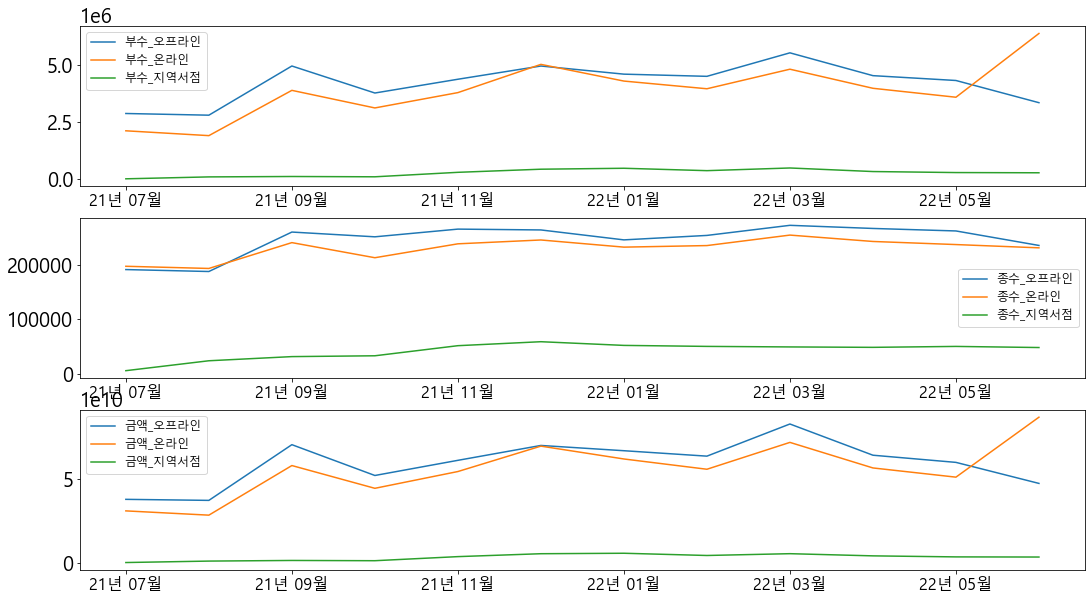

In [37]:

fig = plt.figure(figsize=(18, 10))
ax = plt.subplot(3,1,1)
total_report.filter(like = '부수').plot(ax = ax)
ax = plt.subplot(3,1,2)
total_report.filter(like = '종수').plot(ax = ax)
ax = plt.subplot(3,1,3)
total_report.filter(like = '금액').plot(ax = ax)

9월 : 